# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [1]:
# load required libraries/modules
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df=pd.read_csv(r"C:\Users\yuvraj\Downloads\python\advanced python\covid_19_data.csv")
df.head(10)

# Display basic information about the dataset


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [3]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [4]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

# 2. Data Cleaning:

In [5]:
#Handle missing values.
#Convert data types if necessary.
#Check for duplicates.

In [6]:
df.dropna(inplace=True)

In [27]:
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [7]:
# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['ObservationDate']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
306424   2021-05-29
306425   2021-05-29
306426   2021-05-29
306427   2021-05-29
306428   2021-05-29
Name: ObservationDate, Length: 228326, dtype: datetime64[ns]

In [8]:

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())


Number of duplicates: 0


In [10]:
cat=[]
con=[]

for i in df.columns:
    if df[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [11]:
cat

['Province/State', 'Country/Region', 'Last Update']

In [12]:
con

['SNo', 'ObservationDate', 'Confirmed', 'Deaths', 'Recovered']

# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [15]:
# Descriptive statistics
print(df.describe())

# Summary statistics for categorical columns
print(df['Country/Region'].value_counts())


                 SNo                ObservationDate     Confirmed  \
count  228326.000000                         228326  2.283260e+05   
mean   158732.777113  2020-11-14 03:17:45.686780928  8.021381e+04   
min         1.000000            2020-01-22 00:00:00 -3.028440e+05   
25%     85431.250000            2020-08-11 00:00:00  1.225000e+03   
50%    159305.500000            2020-11-18 00:00:00  1.175750e+04   
75%    232835.750000            2021-02-22 00:00:00  4.841125e+04   
max    306429.000000            2021-05-29 00:00:00  5.713215e+06   
std     85862.065298                            NaN  2.493661e+05   

              Deaths     Recovered  
count  228326.000000  2.283260e+05  
mean     1961.373273  4.184345e+04  
min      -178.000000 -8.544050e+05  
25%        15.000000  0.000000e+00  
50%       234.000000  1.211000e+03  
75%      1411.000000  1.660275e+04  
max    112385.000000  6.399531e+06  
std      5871.937048  1.793670e+05  
Country/Region
Russia            30129
US    

# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

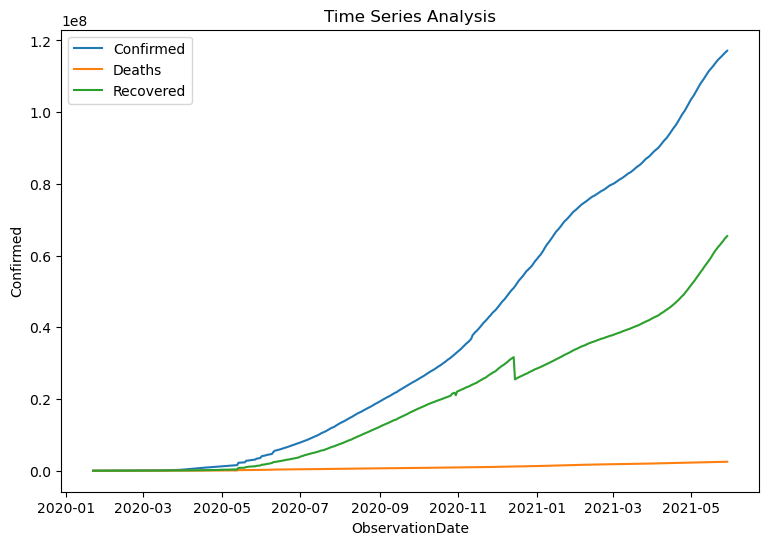

In [16]:
# Time series analysis
#groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot time series data using line plot

# syntax: 
plt.figure(figsize=(9,6))
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_time, x='ObservationDate', y='Recovered', label='Recovered')
plt.title("Time Series Analysis")
plt.show()




# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

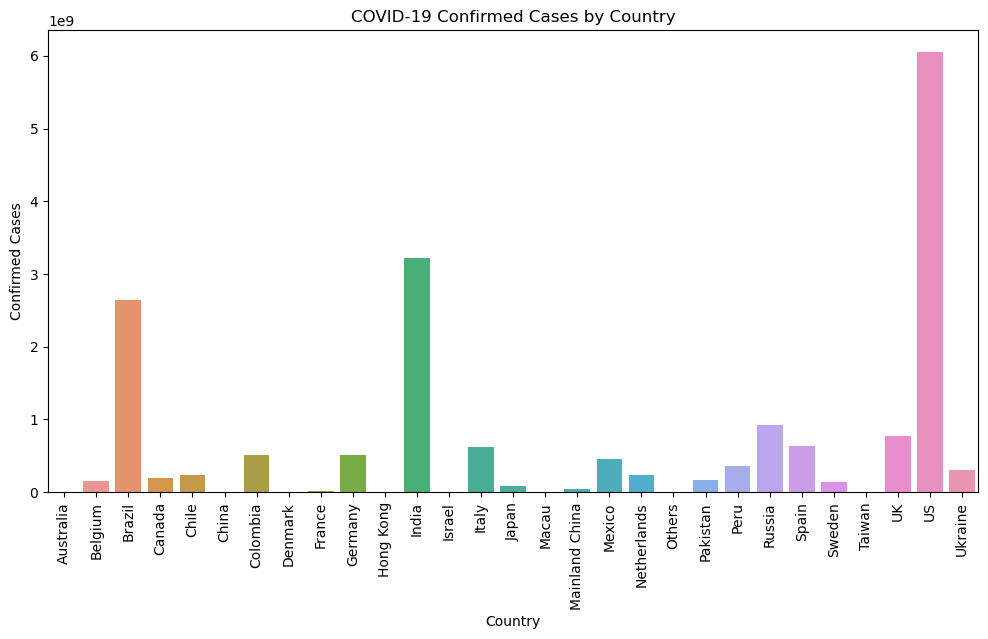

In [17]:
# Geographical analysis
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
plt.figure(figsize=(12,6))
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)
plt.title('COVID-19 Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90, ha='center')
plt.show()


# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

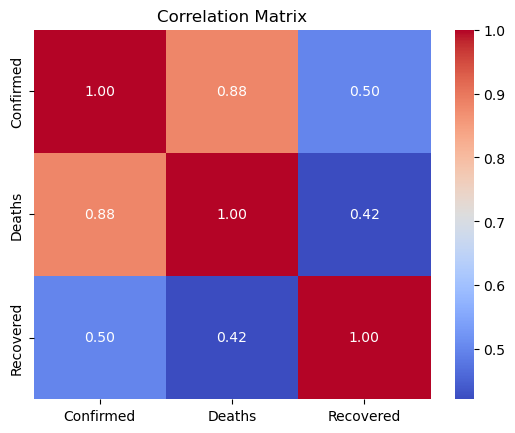

In [18]:
# Correlation analysis between confirmed,deaths and recovered
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

# Plot correlation on heat map

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [22]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.
covid_country_region = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
covid_country_region


,Confirmed,Deaths,Recovered
Country/Region,,,
Australia,9.447430e+06,268435.0,7.219933e+06
Belgium,1.547341e+08,4219275.0,0.000000e+00
Brazil,2.649295e+09,72339029.0,2.311993e+09
Canada,1.934975e+08,5692896.0,1.715769e+08
Chile,2.315812e+08,5707664.0,2.166768e+08
China,0.000000e+00,0.0,0.000000e+00
Colombia,5.148170e+08,13962927.0,4.686380e+08
Denmark,2.122260e+05,186.0,1.929090e+05
France,1.918464e+07,157809.0,9.383745e+06


In [23]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.
Highest_number = df.sort_values(by=['Country/Region','Confirmed','Deaths','Recovered'],ascending=False)
Highest_number


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306083,306084,2021-05-29,Kiev,Ukraine,2021-05-30 04:20:55,206278.0,5076.0,163588.0
305318,305319,2021-05-28,Kiev,Ukraine,2021-05-29 04:20:41,205901.0,5070.0,161908.0
304553,304554,2021-05-27,Kiev,Ukraine,2021-05-28 04:20:36,205517.0,5055.0,157728.0
303788,303789,2021-05-26,Kiev,Ukraine,2021-05-27 04:20:59,205063.0,5044.0,154532.0
303023,303024,2021-05-25,Kiev,Ukraine,2021-05-26 04:20:35,204678.0,5035.0,150195.0
...,...,...,...,...,...,...,...,...
7115,7116,2020-03-19,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0
7416,7417,2020-03-20,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0
7722,7723,2020-03-21,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0
7925,7926,2020-03-22,External territories,Australia,3/8/20 5:31,0.0,0.0,0.0


In [24]:
# Visualize the distribution of deaths using bar chart
covid_death = df.groupby('Country/Region').agg({'Deaths': 'max'})
covid_death


,Deaths
Country/Region,
Australia,820.0
Belgium,24921.0
Brazil,111123.0
Canada,11125.0
Chile,15354.0
China,0.0
Colombia,18683.0
Denmark,13.0
France,860.0


<Axes: >

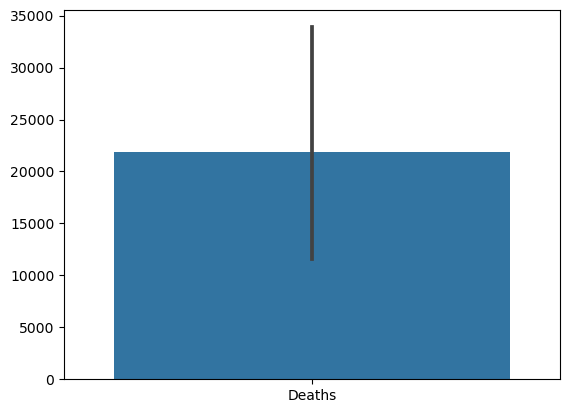

In [25]:
sns.barplot(covid_death)